
################## -- Desarrollo e Implementacion Algoritmos de ML -- ###########################

######## Autores: Andre Chavez  ########################## 


#### 1 LIBRERÍAS A UTILIZAR

In [3]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

#### 2 EXTRAYENDO LA DATA

In [4]:
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DesarrolloeImplementacionML/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [5]:
train.head(10) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
# Viendo los valores perdidos

In [7]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [8]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [9]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0
2,LP001005,2.0,2.0,1.0,1,2.0,3000,0.0,66.0,360.0,2.0,3,1
3,LP001006,2.0,2.0,1.0,2,1.0,2583,2358.0,120.0,360.0,2.0,3,1
4,LP001008,2.0,1.0,1.0,1,1.0,6000,0.0,141.0,360.0,2.0,3,1


In [10]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mean())    

In [11]:
train_parametrica.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.817590,1.653094,1.744300,1.218241,1.133550,5403.459283,1621.245798,146.412162,342.000000,1.855049,2.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,2.000000,1.000000,0.000000
50%,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,2.000000,2.000000,1.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,2.000000,3.000000,1.000000
max,2.000000,2.000000,4.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,3.000000,1.000000


In [12]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


#### Modelado de la Información ####

In [13]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [14]:
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), train_parametrica['Loan_Status'], test_size=0.30,
                                                   random_state=100)

#### Modelos Supervisados : Regresión Logística

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression()
lr.fit(X_train, y_train)


C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_pred=lr.predict(X_test)

In [17]:
#Atributos
#lr.coef_ 
#lr.score(X, y)

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.773

	Precision: 0.763
	Recall: 0.951
	F1: 0.847



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [18]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
lr = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.807


C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=4 , n_estimators=200,oob_score=True,max_depth=2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [20]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = rf.predict(X_test)

In [21]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.778

	Precision: 0.758
	Recall: 0.975
	F1: 0.853



In [22]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
# Probar con diferentes parámetros de min_samples_leaf = 20
kfold = model_selection.KFold(n_splits=10, random_state=7)
rf = RandomForestClassifier(max_features='sqrt', n_estimators=50,oob_score=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.779


### AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostClassifier
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost=AdaBoostClassifier()
AdaBoost.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [24]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = AdaBoost.predict(X_test)

In [25]:
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.757

	Precision: 0.762
	Recall: 0.918
	F1: 0.833



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [26]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
AdaBoost=AdaBoostClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(AdaBoost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.800


### Gradient Boosting Machine

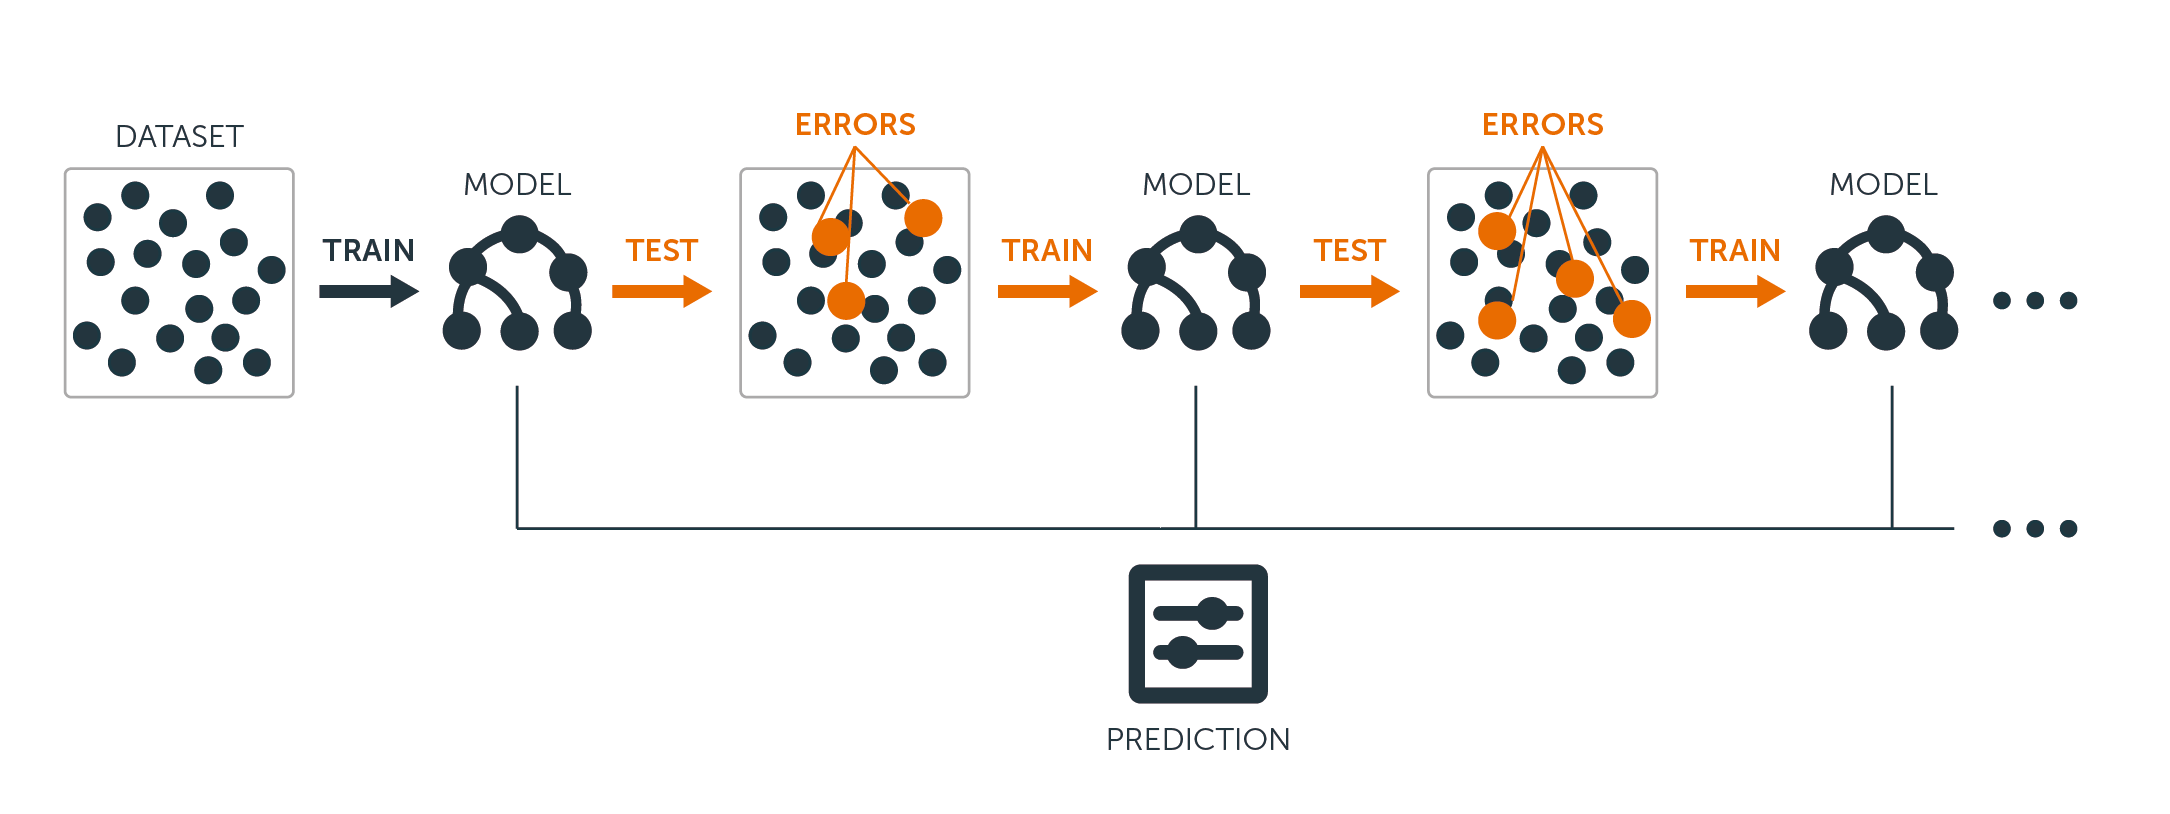

In [27]:
from sklearn import ensemble

params = {'n_estimators': 120, 'max_depth': 3, 'subsample': 0.70,
          'learning_rate': 0.01, 'min_samples_leaf': 20, 'random_state': 3}
Gboost = ensemble.GradientBoostingClassifier(**params)
Gboost.fit(X_train, y_train) 

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              n_iter_no_change=None, presort='auto', random_state=3,
              subsample=0.7, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [28]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = Gboost.predict(X_test)

In [29]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.778

	Precision: 0.758
	Recall: 0.975
	F1: 0.853



In [30]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
Gboost = ensemble.GradientBoostingClassifier(**params)
scoring = 'accuracy'
results = model_selection.cross_val_score(Gboost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.823


####  Ensamble de Modelos 

In [31]:
from sklearn.ensemble import VotingClassifier
eclf2 = VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier(**params)), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0))],
                        voting='soft')

eclf2.fit(X_train, y_train) 



C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier(estimators=[('GBoost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_lea...ors='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [32]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = eclf2.predict(X_test)

In [33]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.778

	Precision: 0.758
	Recall: 0.975
	F1: 0.853



#### 8 ELECCIÓN DEL MEJOR MODELO

In [34]:
# Selección del mejor Modelo
# Cargamos todos los modelos que necesitamos

import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [35]:
kfolds = StratifiedKFold(shuffle=True, random_state=1)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


##### Creamos una función para probar todos nuestros modelos

In [36]:
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X, y)
    y_ = model.predict(X_test)
    accuracy += [accuracy_score(y_test, y_)]
    f1 += [f1_score(y_test, y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1), str(end - start)]

##### Agrupamos Familias de Modelos según nuestro criterio

In [37]:
# stackclf.fit(X_final, y_final) 
def run_linear_models(X, y):
    
    run_model(LogisticRegression(), X_train, y_train)
    
def run_misc_models(X, y):

    run_model(DecisionTreeClassifier(), X_train, y_train)
    
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_train, y_train)
    run_model(AdaBoostClassifier(), X_train, y_train)
    run_model(GradientBoostingClassifier(), X_train, y_train)    
    run_model(XGBClassifier(), X_train, y_train)
    run_model(VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier(**params)), ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft'), X_train, y_train)

In [38]:
results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 'time'])

#### Corremos todas las familias de modelos propuestos

In [39]:
run_linear_models(X_train, y_train)
run_misc_models(X_train, y_train)
run_ensemble_models(X_train, y_train)


LogisticRegression
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier


C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


VotingClassifier


C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Tabla de Resultados con todos nuestros modelos

In [40]:
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
0,LogisticRegression,0.772973,0.0,0.846715,0.0,0
1,DecisionTreeClassifier,0.648649,0.0,0.734694,0.0,18
2,RandomForestClassifier,0.762162,0.0,0.829457,0.0,20
3,AdaBoostClassifier,0.756757,0.0,0.832714,0.0,56
4,GradientBoostingClassifier,0.740541,0.0,0.820896,0.0,77
5,XGBClassifier,0.767568,0.0,0.843636,0.0,36
6,VotingClassifier,0.772973,0.0,0.850000,0.0,200


#### Tabla de Resultados con todos nuestros modelos ordenados por algún criterio

In [41]:
results.iloc[results['f1-score'].sort_values(ascending=False).index].head(19)

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
6,VotingClassifier,0.772973,0.0,0.850000,0.0,200
0,LogisticRegression,0.772973,0.0,0.846715,0.0,0
5,XGBClassifier,0.767568,0.0,0.843636,0.0,36
3,AdaBoostClassifier,0.756757,0.0,0.832714,0.0,56
2,RandomForestClassifier,0.762162,0.0,0.829457,0.0,20
4,GradientBoostingClassifier,0.740541,0.0,0.820896,0.0,77
1,DecisionTreeClassifier,0.648649,0.0,0.734694,0.0,18


### Listo!!!! Elegimos el mejor clasificador

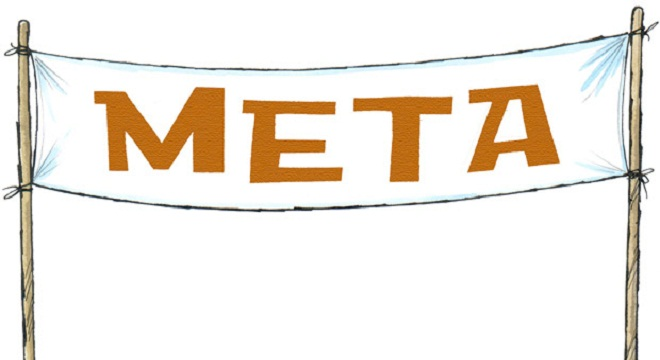